In [ ]:
# Instalamos dependencias necesarias
!pip install paddlepaddle-gpu
!pip install paddleocr
!pip install PyMuPDF
!pip install pdf2image
!apt-get install poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
poppler-utils is already the newest version (22.02.0-2ubuntu0.4).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [ ]:
from pdf2image import convert_from_path

# Convertimos PDF a imagen
pdf_path = '/content/Respuesta Yaguar.pdf'
image = convert_from_path(pdf_path, dpi=500)
image = image[0]

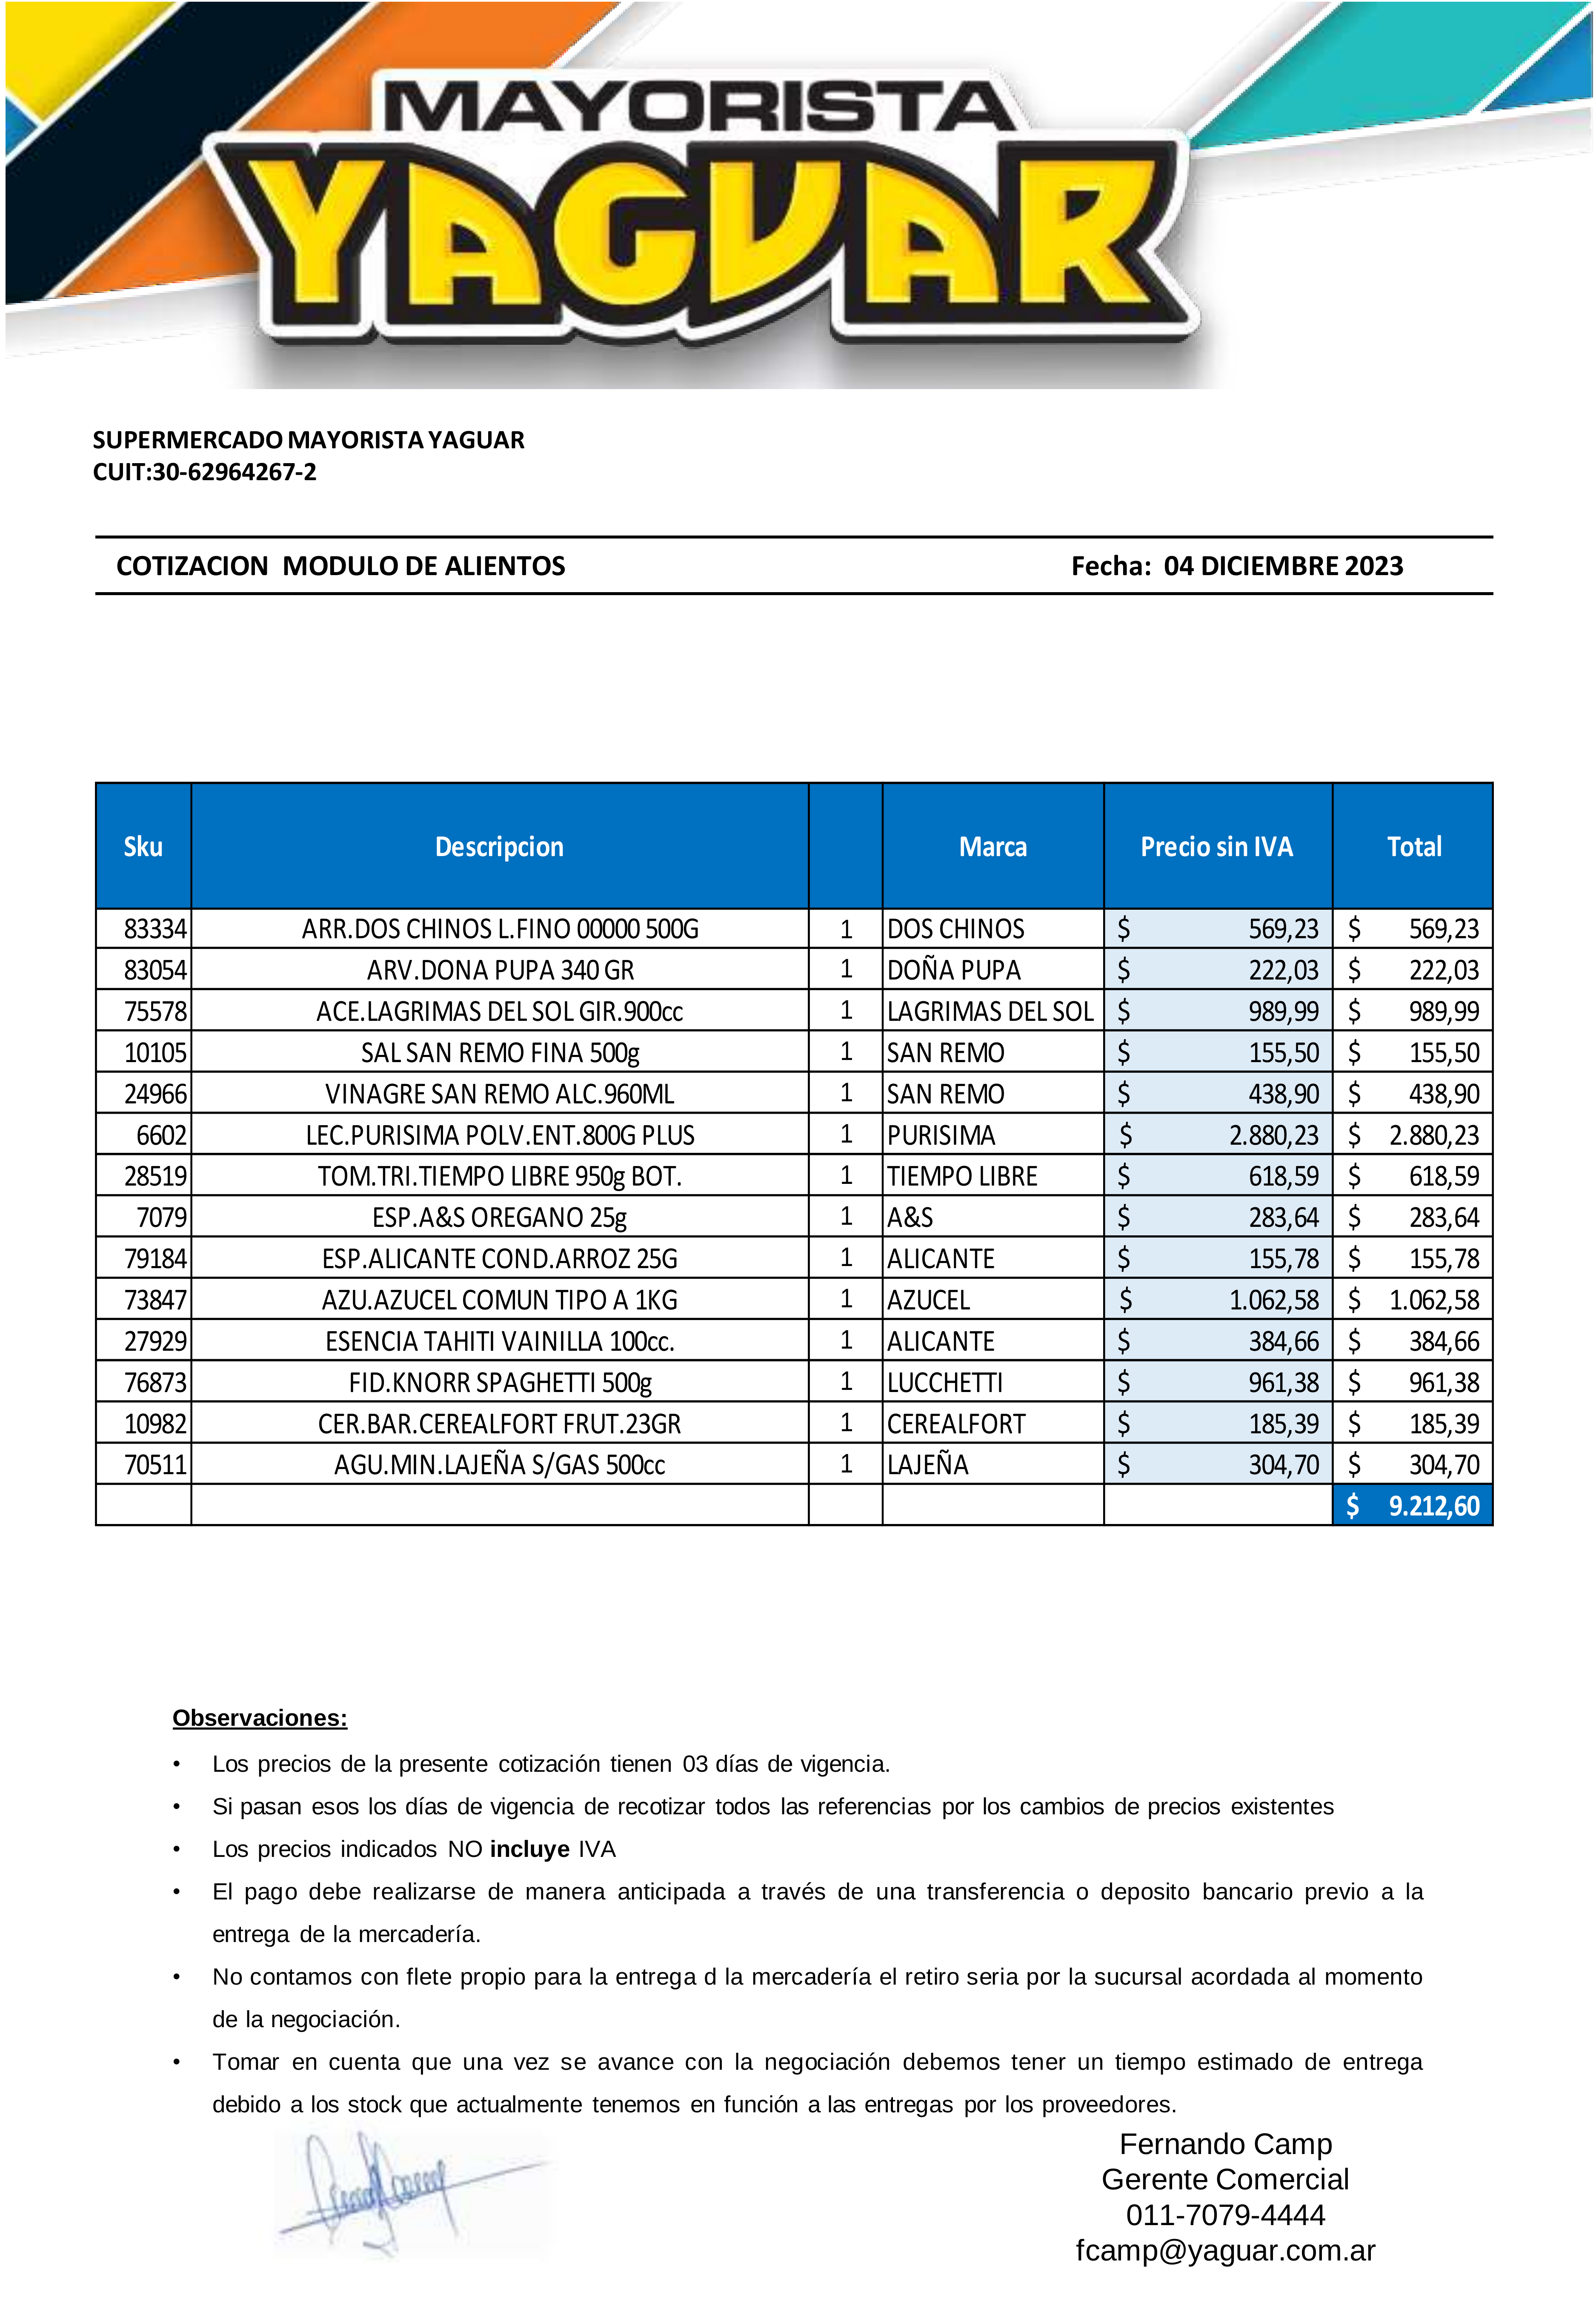

In [ ]:
image

In [ ]:
# Guardamos la imagen
img_path = "yaguar.jpg"
image.save(img_path)

In [ ]:
import pandas as pd
from paddleocr import PPStructure

# Inicializar PPStructure para la extracción de tablas con recovery y OCR
table_engine = PPStructure(recovery=True, return_ocr_result_in_table=True)

[2024/07/22 04:48:58] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=True, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/ch/ch_PP-OCRv4_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/ch/ch_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_ch

In [ ]:
import cv2

# Leemos la imagen con OpenCV
img = cv2.imread(img_path)

# Corremos la detección de tablas
results = table_engine(img)

[2024/07/22 04:49:11] ppocr DEBUG: dt_boxes num : 138, elapsed : 0.2549922466278076
[2024/07/22 04:49:13] ppocr DEBUG: rec_res num  : 138, elapsed : 1.136885404586792
[2024/07/22 04:49:14] ppocr DEBUG: dt_boxes num : 119, elapse : 0.13645625114440918
[2024/07/22 04:49:15] ppocr DEBUG: rec_res num  : 119, elapse : 0.493441104888916


In [ ]:
# Cantidad de resultados
len(results)

7

In [ ]:
# Tipo de resultados
[res["type"] for res in results]

['text', 'text', 'text', 'title', 'title', 'table', 'reference']

In [ ]:
# Filtramos las tablas
tables = [res for res in results if res["type"] == "table"]

In [ ]:
# Cantidad de tablas
len(tables)

1

In [ ]:
# Tomamos la primera tabla
table = tables[0]
table

{'type': 'table',
 'bbox': [206, 1803, 3533, 3607],
 'img': array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         

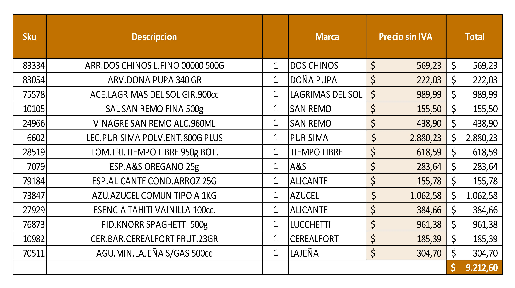

In [ ]:
from matplotlib import pyplot as plt

# Exploramos la imagen recortada de la tabla detectada para validar si es correcta
plt.imshow(table["img"], interpolation="nearest")
plt.axis("off")
plt.show()

In [ ]:
# Extraemos la tabla en HTML y convertimos a DataFrame
html_table = table.get("res").get("html")
html_data = pd.read_html(html_table)
df = pd.DataFrame(html_data[0])
df

,0,1,2,3,4,5
0,Sku,Descripcion,NaN,Marca,Precio sin IVA,Total
1,83334,ARR.DOS CHINOS L.FINO 00000 500G,1.0,DOS CHINOS,"$ 569,23","$ 569,23"
2,83054,ARV.DONA PUPA 340 GR,1.0,DONA PUPA,"$ 222,03","$ 222,03"
3,75578,ACE.LAGRIMAS DEL SOL GIR.900cC,1.0,LAGRIMAS DEL SOL,"$ 989,99","$ 989,99"
4,10105,SAL SAN REMO FINA 500g,1.0,SAN REMO,"$ 155,50","$ 155,50"
5,24966,VINAGRE SAN REMO ALC.960ML,1.0,SAN REMO,"S 438,90","$ 438,90"
6,6602,LEC.PURISIMA POLV.ENT.80OG PLUS,1.0,PURISIMA,"$ 2.880,23","2.880,23 S"
7,28519,TOM.TRI.TIEMPO LIBRE 95Og BOT.,1.0,TIEMPO LIBRE,"$ 618,59","$ 618,59"
8,7079,ESP.A&S OREGANO 25g,1.0,A&S,"$ 283,64","$ 283,64"
9,79184,ESP.ALICANTE COND.ARROZ 25G,1.0,ALICANTE,"$ 155,78","$ 155,78"


In [ ]:
# Seteamos las columnas
df.columns = df.iloc[0]
df = df.iloc[1:]
df.reset_index(inplace=True, drop=True)
df

,Sku,Descripcion,NaN,Marca,Precio sin IVA,Total
0,83334,ARR.DOS CHINOS L.FINO 00000 500G,1.0,DOS CHINOS,"$ 569,23","$ 569,23"
1,83054,ARV.DONA PUPA 340 GR,1.0,DONA PUPA,"$ 222,03","$ 222,03"
2,75578,ACE.LAGRIMAS DEL SOL GIR.900cC,1.0,LAGRIMAS DEL SOL,"$ 989,99","$ 989,99"
3,10105,SAL SAN REMO FINA 500g,1.0,SAN REMO,"$ 155,50","$ 155,50"
4,24966,VINAGRE SAN REMO ALC.960ML,1.0,SAN REMO,"S 438,90","$ 438,90"
5,6602,LEC.PURISIMA POLV.ENT.80OG PLUS,1.0,PURISIMA,"$ 2.880,23","2.880,23 S"
6,28519,TOM.TRI.TIEMPO LIBRE 95Og BOT.,1.0,TIEMPO LIBRE,"$ 618,59","$ 618,59"
7,7079,ESP.A&S OREGANO 25g,1.0,A&S,"$ 283,64","$ 283,64"
8,79184,ESP.ALICANTE COND.ARROZ 25G,1.0,ALICANTE,"$ 155,78","$ 155,78"
9,73847,AZU.AZUCEL COMUN TIPO A 1KG,1.0,AZUCEL,"$ 1.062,58","1.062,58 S"


In [ ]:
import re

# Definimos un patrón de regex para limpiar los precios
price_pattern = r"\d+(?:[.,]\d+)*"

# Extraemos sólo lo que matchea contra el patrón
df["Precio sin IVA"] = df["Precio sin IVA"].map(lambda x: re.findall(price_pattern, x)[0] if isinstance(x, str) else None)
df["Total"] = df["Total"].map(lambda x: re.findall(price_pattern, x)[0] if isinstance(x, str) else None)
df

,Sku,Descripcion,NaN,Marca,Precio sin IVA,Total
0,83334,ARR.DOS CHINOS L.FINO 00000 500G,1.0,DOS CHINOS,"569,23","569,23"
1,83054,ARV.DONA PUPA 340 GR,1.0,DONA PUPA,"222,03","222,03"
2,75578,ACE.LAGRIMAS DEL SOL GIR.900cC,1.0,LAGRIMAS DEL SOL,"989,99","989,99"
3,10105,SAL SAN REMO FINA 500g,1.0,SAN REMO,"155,50","155,50"
4,24966,VINAGRE SAN REMO ALC.960ML,1.0,SAN REMO,"438,90","438,90"
5,6602,LEC.PURISIMA POLV.ENT.80OG PLUS,1.0,PURISIMA,"2.880,23","2.880,23"
6,28519,TOM.TRI.TIEMPO LIBRE 95Og BOT.,1.0,TIEMPO LIBRE,"618,59","618,59"
7,7079,ESP.A&S OREGANO 25g,1.0,A&S,"283,64","283,64"
8,79184,ESP.ALICANTE COND.ARROZ 25G,1.0,ALICANTE,"155,78","155,78"
9,73847,AZU.AZUCEL COMUN TIPO A 1KG,1.0,AZUCEL,"1.062,58","1.062,58"


In [ ]:
# Llevamos a valores numéricos
df["Precio sin IVA"] = df["Precio sin IVA"].str.replace(".", "").str.replace(",", ".").astype(float)
df["Total"] = df["Total"].str.replace(".", "").str.replace(",", ".").astype(float)
df

,Sku,Descripcion,NaN,Marca,Precio sin IVA,Total
0,83334,ARR.DOS CHINOS L.FINO 00000 500G,1.0,DOS CHINOS,569.23,569.23
1,83054,ARV.DONA PUPA 340 GR,1.0,DONA PUPA,222.03,222.03
2,75578,ACE.LAGRIMAS DEL SOL GIR.900cC,1.0,LAGRIMAS DEL SOL,989.99,989.99
3,10105,SAL SAN REMO FINA 500g,1.0,SAN REMO,155.50,155.50
4,24966,VINAGRE SAN REMO ALC.960ML,1.0,SAN REMO,438.90,438.90
5,6602,LEC.PURISIMA POLV.ENT.80OG PLUS,1.0,PURISIMA,2880.23,2880.23
6,28519,TOM.TRI.TIEMPO LIBRE 95Og BOT.,1.0,TIEMPO LIBRE,618.59,618.59
7,7079,ESP.A&S OREGANO 25g,1.0,A&S,283.64,283.64
8,79184,ESP.ALICANTE COND.ARROZ 25G,1.0,ALICANTE,155.78,155.78
9,73847,AZU.AZUCEL COMUN TIPO A 1KG,1.0,AZUCEL,1062.58,1062.58


In [ ]:
# Definimos un diccionario de patrones para cada tipo de producto
product_patterns = {
    r"ARR(?:\.?OZ)?": "ARROZ",
    r"ARV(?:\.?EJAS)?": "ARVEJAS",
    r"SAL(?: ?FINA)?": "SAL",
    r"ACE(?:\.?ITE)?": "ACEITE",
    r"VIN(?:\.?AGRE)?": "VINAGRE",
    r"LEC(?:\.?HE)?": "LECHE",
    r"TOM(?:\.?ATES?)?(?:[\. ]?TRI(?:\.?TURADOS?)?)?": "TOMATES TRITURADOS",
    r"ESP(?:\.?ECIAS?)?": "ESPECIAS",
    r"AZU(?:\.?CAR?)?": "AZUCAR",
    r"ESENCIA(?:.*VAINILLA)?": "ESENCIA DE VAINILLA",
    r"FID(?:\.?EOS?)?": "FIDEOS",
    r"CER(?:\.?ERAL)?(?:[\. ]?BAR(?:\.?RA)?)?": "CEREAL BARRA",
    r"AGU(?:\.?A?)?(?:[\. ]?MIN(?:\.?ERAL)?)?": "AGUA MINERAL",
}

In [ ]:
df.insert(3, "Producto", None)

for i, r in df.iterrows():
    descr = df.iloc[i]["Descripcion"]
    if not isinstance(descr, str):
        continue

    for pattern, product in product_patterns.items():
        found = re.findall(pattern, descr)
        if found:
            df.loc[i, "Producto"] = product_patterns.get(pattern)

In [ ]:
df

,Sku,Descripcion,NaN,Producto,Marca,Precio sin IVA,Total
0,83334,ARR.DOS CHINOS L.FINO 00000 500G,1.0,ARROZ,DOS CHINOS,569.23,569.23
1,83054,ARV.DONA PUPA 340 GR,1.0,ARVEJAS,DONA PUPA,222.03,222.03
2,75578,ACE.LAGRIMAS DEL SOL GIR.900cC,1.0,ACEITE,LAGRIMAS DEL SOL,989.99,989.99
3,10105,SAL SAN REMO FINA 500g,1.0,SAL,SAN REMO,155.50,155.50
4,24966,VINAGRE SAN REMO ALC.960ML,1.0,VINAGRE,SAN REMO,438.90,438.90
5,6602,LEC.PURISIMA POLV.ENT.80OG PLUS,1.0,LECHE,PURISIMA,2880.23,2880.23
6,28519,TOM.TRI.TIEMPO LIBRE 95Og BOT.,1.0,TOMATES TRITURADOS,TIEMPO LIBRE,618.59,618.59
7,7079,ESP.A&S OREGANO 25g,1.0,ESPECIAS,A&S,283.64,283.64
8,79184,ESP.ALICANTE COND.ARROZ 25G,1.0,ESPECIAS,ALICANTE,155.78,155.78
9,73847,AZU.AZUCEL COMUN TIPO A 1KG,1.0,AZUCAR,AZUCEL,1062.58,1062.58
